https://github.com/Ranlot/single-parameter-fit

In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from functools import partial

from mpmath import mp
mp.dps = 5439
print(mp)

Mpmath settings:
  mp.prec = 18071             [default: 53]
  mp.dps = 5439               [default: 15]
  mp.trap_complex = False     [default: False]


In [3]:
alpha = mp.mpf('0.463406004800666824557593855105990137975396830788788799406429850812968857479514664226243283412526409224323053889329298620674884680614807653801245428919469308172373079322942641202360227578650007223754688896274934988359055383391758293829850434221470982725457359735022532687338511215494901190517834248451285448265371842708045988617035143856167856768582712340813475364570765704579166741118247811907635019198298917217966489107005859347895741438098657205725178271205479197856561037850672129879522515242161264177216257603491080104890743488241655959581874875973354412021850054165797450158223626434843750018638394983196265959603741802793794915427812829783700519044210441213544190602691506293080715968721154985410290873209165113766170134472432472411734812521843264588709842122557905794635100665691959622368502621163462028898131228949982996187469919064379211503505076645956428128534040783841271402054360825578024834290345310790390157764201292608019533762281506986732260967062668290860118506423854754656622501793707337760991154023216516402345421023974141803428499662550508479115404727441236862935469572297407702110742879113149055527617194085296935650623191015534574268383797770649730801656834119742113237468263837444218196978291380760521724166755020555990267694261607255686281239053443432274528655529386504905834827708141706089442776324058716089691838974373763440743573265982831136920706547545670790425882819786211036668109524967527969779967223723277628749474053947870880176615543914166744262214630027283734992403937948535110500248344299187136305853131353682218046738243046757335218216786764669330950811943694440057167817173870537829844388489252523540498771458843268941778755069097830873513594395153243402679954708286149665806000023790971245417225332138012960344159042504216344710268812972632581225724939203682424194561956711130091027718620718546642792669260677116775123113955611299697057503128148636223979840386893630037650333760179877070001908212037949224957712093826642896796650955983115438385248487587052141917285881733670595186145169303041084222197914089144903374766381914737286553419694885356998294869581500701349205872110251601448659575510631430762517564607076723449426934392968901949790816742625567699213646111978993216724102269870299966779064590224246647049087061947017258879815549872679581125170920125777673178707708241664999586416119618216595530037576096786128923522421240000182013383118194283758164816974070248895504074829789709868902268171507523861969685504995922027029703784668192915845965400391863922932421053439871961263595042988279692051985621251029747822617314768908449013752207391693752117304063802306189176894639063799168680649982219605566544806663595669547258004225011773266100828498890959275628649717871464995766384195323809926567195217013819949600635285658721170193225938358803626880839189084198591652220264437038701216386584109311257032582742712215304264004504984307667611764800155653042705929270491212290737424456007103068265819558662648029089743070459776201428069086003677861169300301081990834225597174983066899858646074747063399062581014619344191628820674935556290699282030422920147517404391107125000714920984040399655696286487720378499561659230554129923762897422378775830848474081312524954968326443601739711604208043340866169473485087226252514481601301752880155643082799860863052618451717133782285013130728913961198460585249872475950029592179056633725915575396663383156310443044360106558020069578197943069344389306750183633484341376164660138348903525145591268843208028906125613430952497605599813721003200279262829543589430092101894442849623606902309531995601334251641859848332447203027146189585905882456091243239133040136236051980822776492181623029063353480918325798260503029995565374682134552010971605907371039228626700575539580573354520047676084407835875076777756130012848670146479856599981587850822008745212507437690494401711468879042551734354133180728079014910824039945421540791144134030049358238502634613309706889830869099031236304584845542664773305416196929867394210101735501366730227633811565957580297510300311075822768946974843565055021868897486083699521104369433174459665198236966276886889060469533773657412880355420537561866030081486333478281494277532594632256402566483707566548328854117977435891875404531962593066368580103889644790579491747464775619952106654082236182075549337543622605764132073893688936277870316226014372031484026034749473173913112084317390305661000173894537765000029677604283472529913477735865836001616790181994263467920704577181060807815007565707768578572288643430778657264759964614938323938688678438124617998546624819958818366174855560710502515882502494650724777032908489614308206294474854480037054680914826175602191589557422046410684070519378429256300229320599452898308902426009632475380868674072876933879242093295530072147294861341588410616538217305297516580024050759496270068342160183574192295598398547544859028547444496057786158156106279189673270747465928888855601384427108942171326183630099037118293026517949012016915769660604111510823335237115639782806229852022408021381659085495828239449124605526041684371892451738422930071138710234591125350188789083822399620531008596209129182422107080467028223014840187128379853366106391298528660033680236615035176294627611724554552655630812549178509593192924469312009047433125280967425386838370898456963015670645344796602303825982593762865899409989667121211014951774956644493348940670589196951159818849942458285927872352869543454776608513700796754688807')
tau = 12

f = lambda x: mp.power(mp.sin(mp.power(2, (x * tau)) * mp.asin(mp.sqrt(alpha))), 2)

In [4]:
n = int(2e3)
x = np.linspace(1, n, n)
y = [f(i) for i in tqdm(x)]

  0%|          | 0/2000 [00:00<?, ?it/s]

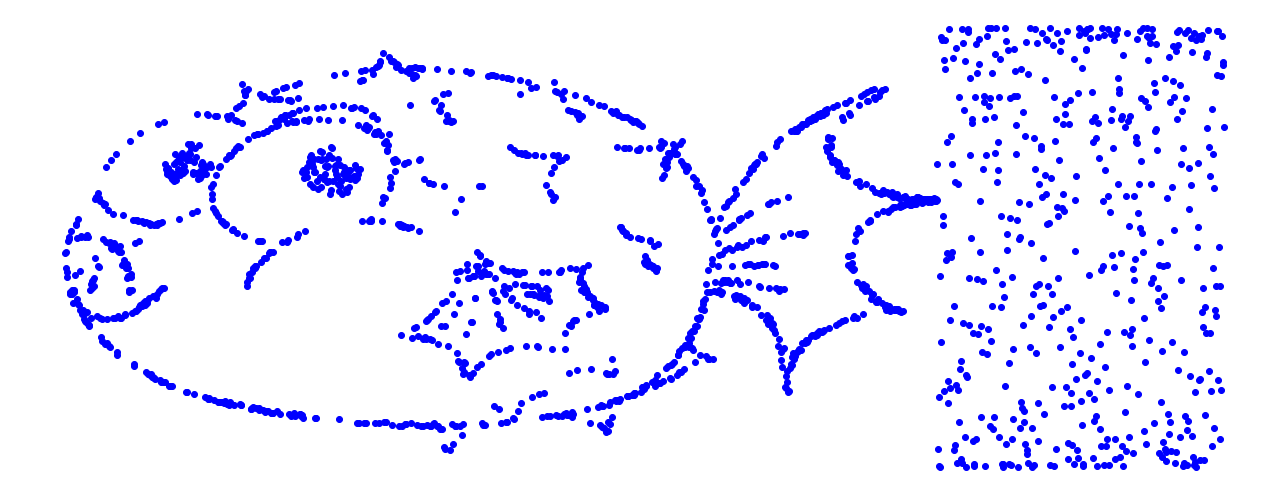

In [5]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 7), nrows=1, ncols=1) 
    ax.scatter(x, y, color='blue')
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()